# Capstone Project

This workbook contains my submission for the Capstone Project for IBM Data Science Professional Certificate

In [1]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course")

Hello Capstone Project Course


 ## Introduction/Business Problem

Drivers and insurers alike are keen to understand what is the probability and potential severity of accidents occurring on a given journey and under certain observable conditions. This model will use factors such as weather conditions, time of day and area to help derive predictions. 
The output of this model will help users in determining the appetite for undertaking particular journeys or perhaps assist insurers in determining the premium level which should be applied to insurance. 

## Data 

The dataset is based on publicly available collision data for the Seattle and as captured by Seattle Police Department. It contains records from 2004 to present. The data is presented in a CSV format and contains the following attributes which will form the main element of our modelling:
- Severity Descriptions
- Person Count
- Vehicle Count 
- Date
- Time
- Weather 
- Light Conditions

### Importing and Cleansing the Data

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", index_col=3, low_memory=False)

In [3]:
df.head()

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
3,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
4,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
5,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1 to 219547
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   INCKEY          194673 non-null  int64  
 4   COLDETKEY       194673 non-null  int64  
 5   REPORTNO        194673 non-null  object 
 6   STATUS          194673 non-null  object 
 7   ADDRTYPE        192747 non-null  object 
 8   INTKEY          65070 non-null   float64
 9   LOCATION        191996 non-null  object 
 10  EXCEPTRSNCODE   84811 non-null   object 
 11  EXCEPTRSNDESC   5638 non-null    object 
 12  SEVERITYCODE.1  194673 non-null  int64  
 13  SEVERITYDESC    194673 non-null  object 
 14  COLLISIONTYPE   189769 non-null  object 
 15  PERSONCOUNT     194673 non-null  int64  
 16  PEDCOUNT        194673 non-null  int64  
 17  PEDCYLCOUN

In [5]:
#Cutting down the data

df2 = df.filter(['objectID','SEVERITYCODE','SEVERITYDESC','INCDATE','INCDTTM','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND'], axis=1)

In [6]:
df2.head()

,SEVERITYCODE,SEVERITYDESC,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
OBJECTID,,,,,,,,,,
1,2,Injury Collision,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight
2,1,Property Damage Only Collision,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On
3,1,Property Damage Only Collision,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight
4,1,Property Damage Only Collision,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight
5,2,Injury Collision,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight


In [7]:
#Replacing Missing Data


df2['INATTENTIONIND'] = df2['INATTENTIONIND'].replace(np.nan, 'Unknown')
df2['WEATHER'] = df2['WEATHER'].replace(np.nan, 'Unknown')
df2['ROADCOND'] = df2['ROADCOND'].replace(np.nan, 'Unknown')
df2['LIGHTCOND'] = df2['LIGHTCOND'].replace(np.nan, 'Unknown')

df2.head()


,SEVERITYCODE,SEVERITYDESC,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
OBJECTID,,,,,,,,,,
1,2,Injury Collision,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),Unknown,N,Overcast,Wet,Daylight
2,1,Property Damage Only Collision,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Unknown,0,Raining,Wet,Dark - Street Lights On
3,1,Property Damage Only Collision,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Unknown,0,Overcast,Dry,Daylight
4,1,Property Damage Only Collision,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Unknown,N,Clear,Dry,Daylight
5,2,Injury Collision,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),Unknown,0,Raining,Wet,Daylight


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1 to 219547
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   SEVERITYDESC    194673 non-null  object
 2   INCDATE         194673 non-null  object
 3   INCDTTM         194673 non-null  object
 4   JUNCTIONTYPE    188344 non-null  object
 5   INATTENTIONIND  194673 non-null  object
 6   UNDERINFL       189789 non-null  object
 7   WEATHER         194673 non-null  object
 8   ROADCOND        194673 non-null  object
 9   LIGHTCOND       194673 non-null  object
dtypes: int64(1), object(9)
memory usage: 16.3+ MB


In [9]:
#Binning The time Incident Date and Time Data

#Convert datatype to "datetime"

df2["INCDATE"] = pd.to_datetime(df2['INCDATE'])

#generate new column with month in 1-12

df2['INCMONTH'] = pd.DatetimeIndex(df2['INCDATE']).month

#Catergorise month by Quarters

criteria = [df2['INCMONTH'].between(1, 3), df2['INCMONTH'].between(4, 6), df2['INCMONTH'].between(7,9), df2['INCMONTH'].between(10,12)]
values = ['Q1', 'Q2', 'Q3','Q4']

df2['QUARTER'] = np.select(criteria, values, 0)

df2.head()



,SEVERITYCODE,SEVERITYDESC,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,INCMONTH,QUARTER
OBJECTID,,,,,,,,,,,,
1,2,Injury Collision,2013-03-27 00:00:00+00:00,3/27/2013 2:54:00 PM,At Intersection (intersection related),Unknown,N,Overcast,Wet,Daylight,3,Q1
2,1,Property Damage Only Collision,2006-12-20 00:00:00+00:00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Unknown,0,Raining,Wet,Dark - Street Lights On,12,Q4
3,1,Property Damage Only Collision,2004-11-18 00:00:00+00:00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Unknown,0,Overcast,Dry,Daylight,11,Q4
4,1,Property Damage Only Collision,2013-03-29 00:00:00+00:00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Unknown,N,Clear,Dry,Daylight,3,Q1
5,2,Injury Collision,2004-01-28 00:00:00+00:00,1/28/2004 8:04:00 AM,At Intersection (intersection related),Unknown,0,Raining,Wet,Daylight,1,Q1


In [10]:
#Time by Morning, Afternoon, Evening, Night

#Convert datatype to "datetime"

df2["INCDTTM"] = pd.to_datetime(df2['INCDTTM'])

#generate new column with month in 1-12

df2['INCHR'] = pd.DatetimeIndex(df2['INCDTTM']).hour

#Catergorise month by Quarters

criteria2 = [df2['INCHR'].between(0, 5), df2['INCHR'].between(6,11), df2['INCHR'].between(12, 17), df2['INCHR'].between(18,23)]
value2 = ['Early Morning','Morning', 'Afternoon', 'Evening']
value3 = [1,2,3,4]

df2['TIMEOFDAY'] = np.select (criteria2,value2,0 )
df2['TIMEOFDAY2'] = np.select (criteria2, value3,0)

df2.head()

,SEVERITYCODE,SEVERITYDESC,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,INCMONTH,QUARTER,INCHR,TIMEOFDAY,TIMEOFDAY2
OBJECTID,,,,,,,,,,,,,,,
1,2,Injury Collision,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),Unknown,N,Overcast,Wet,Daylight,3,Q1,14,Afternoon,3
2,1,Property Damage Only Collision,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),Unknown,0,Raining,Wet,Dark - Street Lights On,12,Q4,18,Evening,4
3,1,Property Damage Only Collision,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),Unknown,0,Overcast,Dry,Daylight,11,Q4,10,Morning,2
4,1,Property Damage Only Collision,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),Unknown,N,Clear,Dry,Daylight,3,Q1,9,Morning,2
5,2,Injury Collision,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),Unknown,0,Raining,Wet,Daylight,1,Q1,8,Morning,2


<br />

### Analysing the Data

Understanding the Data

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='SEVERITYDESC', ylabel='count'>

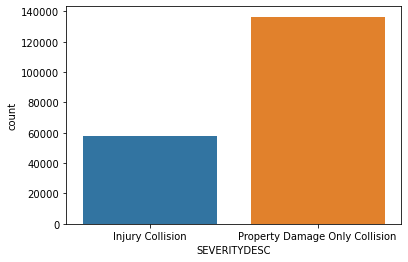

In [12]:
#Distribution of Severity

sns.countplot(x="SEVERITYDESC", data=df2)

<AxesSubplot:xlabel='QUARTER', ylabel='count'>

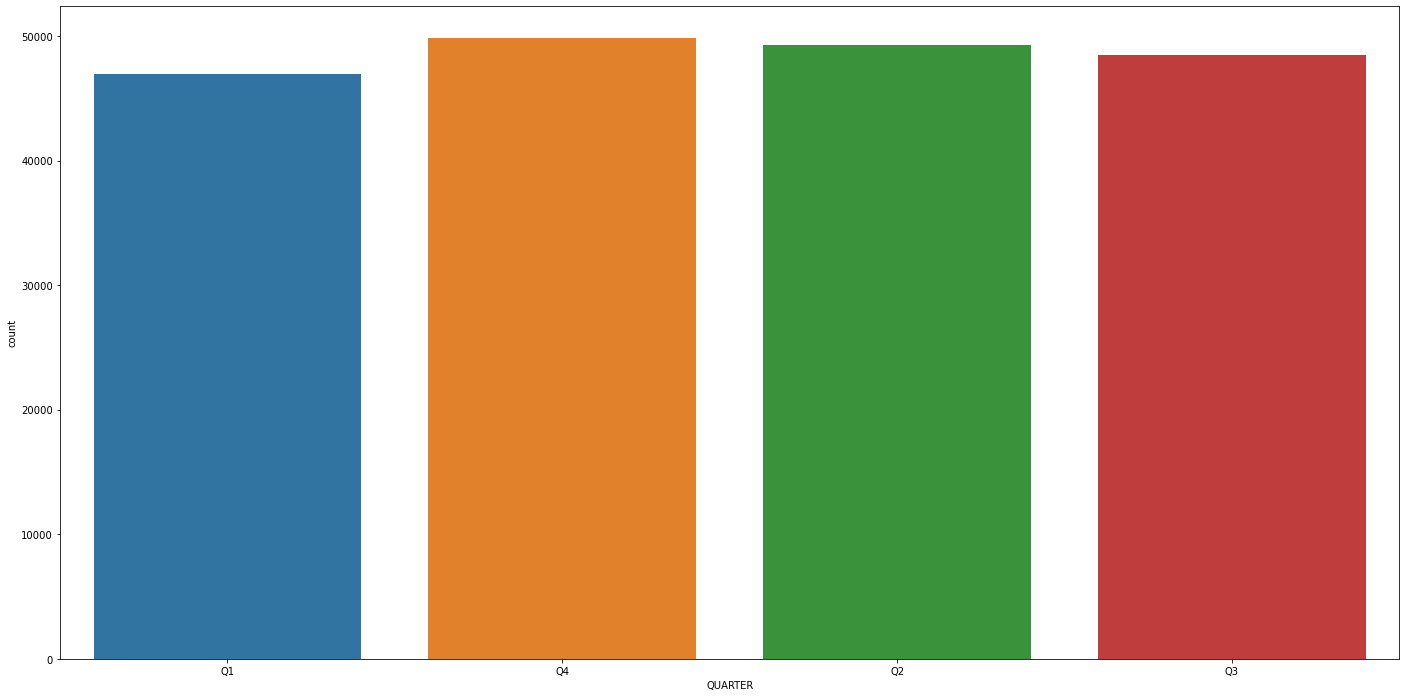

In [13]:
#Distribution of Accident in each Quarter

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)

sns.countplot(x="QUARTER", data=df2)


<AxesSubplot:xlabel='TIMEOFDAY', ylabel='count'>

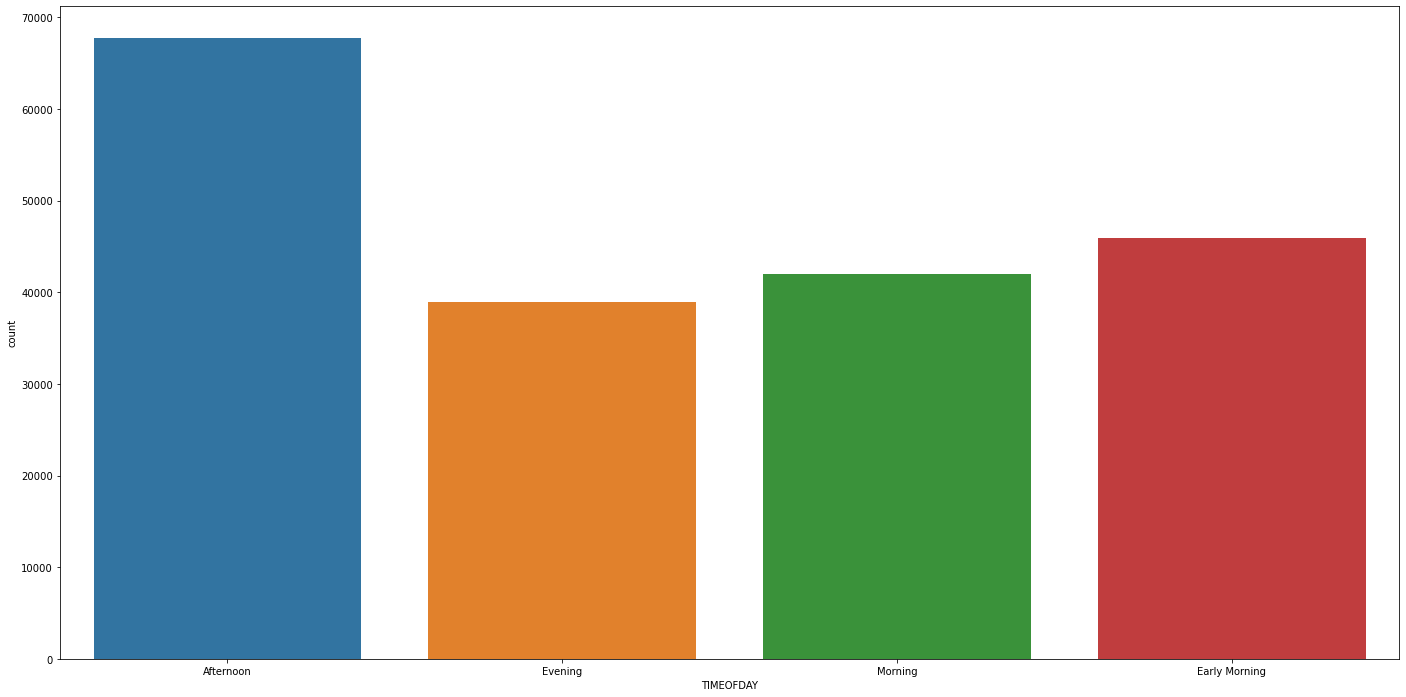

In [14]:
#Distribution by Time of Day


fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)

sns.countplot(x="TIMEOFDAY", data=df2)

<AxesSubplot:xlabel='LIGHTCOND', ylabel='count'>

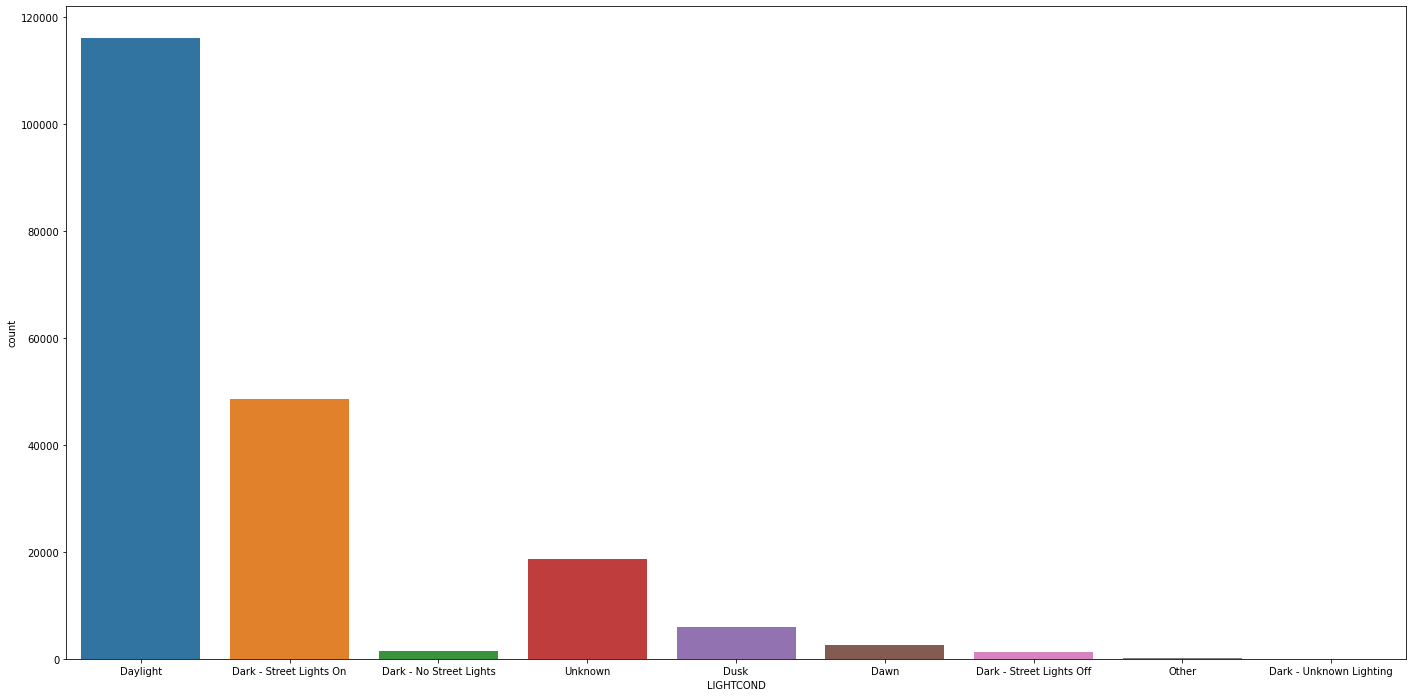

In [15]:
#Distribution of Light Condition at Time of Incident


fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)

sns.countplot(x="LIGHTCOND", data=df2)

<AxesSubplot:xlabel='ROADCOND', ylabel='count'>

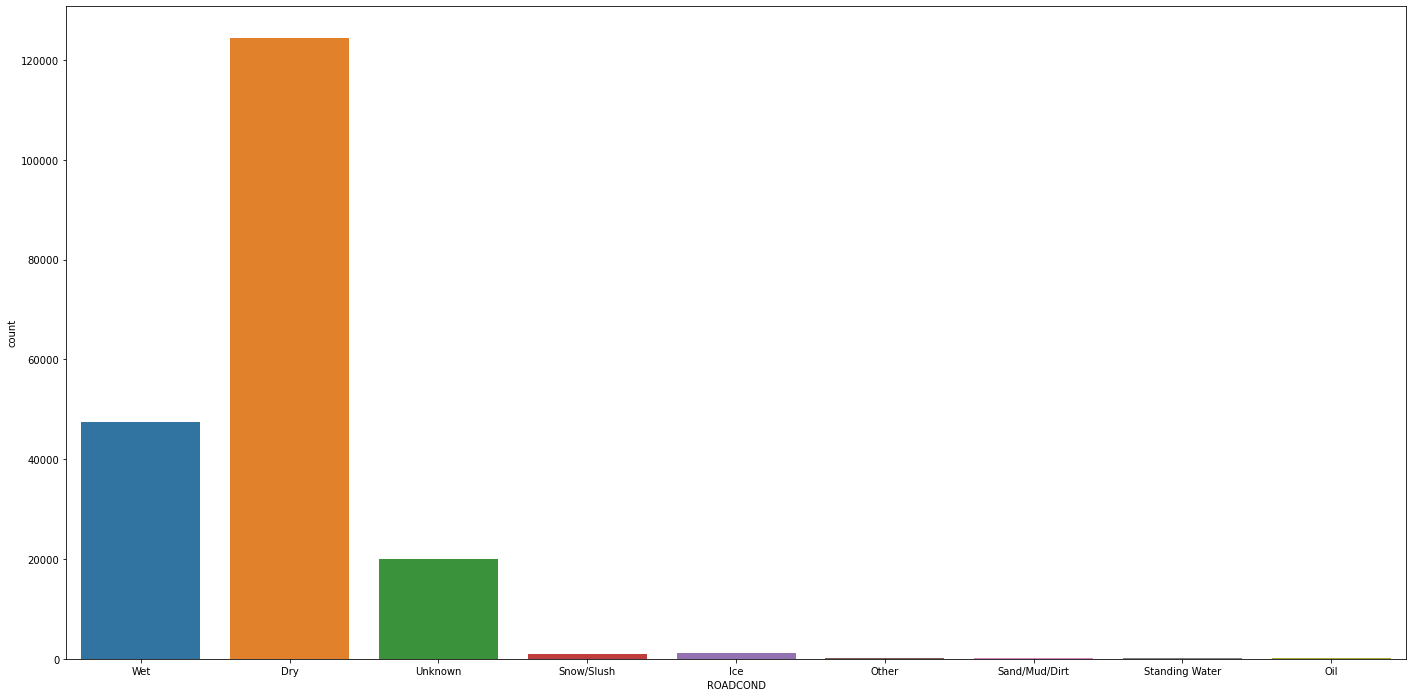

In [16]:
#Distribution of Road Condition at Time of Incident


fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)

sns.countplot(x="ROADCOND", data=df2)

<br />

### Modelling by Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:


dfdtree = df2[['TIMEOFDAY2', 'WEATHER', 'LIGHTCOND', 'QUARTER', 'SEVERITYDESC']]
dfdtree[0:20]

,TIMEOFDAY2,WEATHER,LIGHTCOND,QUARTER,SEVERITYDESC
OBJECTID,,,,,
1,3,Overcast,Daylight,Q1,Injury Collision
2,4,Raining,Dark - Street Lights On,Q4,Property Damage Only Collision
3,2,Overcast,Daylight,Q4,Property Damage Only Collision
4,2,Clear,Daylight,Q1,Property Damage Only Collision
5,2,Raining,Daylight,Q1,Injury Collision
6,3,Clear,Daylight,Q2,Property Damage Only Collision
7,1,Raining,Daylight,Q4,Property Damage Only Collision
9,3,Clear,Daylight,Q2,Injury Collision
10,3,Clear,Daylight,Q2,Property Damage Only Collision


In [19]:
dfdtree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1 to 219547
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   TIMEOFDAY2    194673 non-null  int64 
 1   WEATHER       194673 non-null  object
 2   LIGHTCOND     194673 non-null  object
 3   QUARTER       194673 non-null  object
 4   SEVERITYDESC  194673 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.9+ MB


In [20]:
# ML0101EN-Clas-Decision-Trees-drug-py-v1

X = dfdtree[['TIMEOFDAY2','WEATHER', 'LIGHTCOND', 'QUARTER']].values
X[0:20]

array([[3, 'Overcast', 'Daylight', 'Q1'],
       [4, 'Raining', 'Dark - Street Lights On', 'Q4'],
       [2, 'Overcast', 'Daylight', 'Q4'],
       [2, 'Clear', 'Daylight', 'Q1'],
       [2, 'Raining', 'Daylight', 'Q1'],
       [3, 'Clear', 'Daylight', 'Q2'],
       [1, 'Raining', 'Daylight', 'Q4'],
       [3, 'Clear', 'Daylight', 'Q2'],
       [3, 'Clear', 'Daylight', 'Q2'],
       [3, 'Clear', 'Daylight', 'Q1'],
       [4, 'Overcast', 'Daylight', 'Q2'],
       [3, 'Clear', 'Daylight', 'Q3'],
       [3, 'Raining', 'Dark - Street Lights On', 'Q2'],
       [3, 'Raining', 'Dark - No Street Lights', 'Q4'],
       [1, 'Clear', 'Dark - Street Lights On', 'Q1'],
       [1, 'Unknown', 'Unknown', 'Q2'],
       [1, 'Overcast', 'Daylight', 'Q3'],
       [2, 'Overcast', 'Daylight', 'Q1'],
       [3, 'Clear', 'Daylight', 'Q2'],
       [1, 'Unknown', 'Unknown', 'Q2']], dtype=object)

In [21]:
from sklearn import preprocessing

#converting text categories to number categories

le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear','Overcast','Partly Cloudy','Fog/Smog/Smoke','Blowing Sand/Dirt','Severe Crosswind','Raining','Sleet/Hail/Freezing Rain','Snowing','Other','Unknown'])
X[:,1] = le_weather.transform(X[:,1]) 

le_lightcond = preprocessing.LabelEncoder()
le_lightcond.fit(['Daylight', 'Dawn','Dusk','Dark - Street Lights On','Dark - Street Lights Off','Dark - No Street Lights','Dark - Unknown Lighting','Other','Unknown'])
X[:,2] = le_lightcond.transform(X[:,2]) 

le_quarter = preprocessing.LabelEncoder()
le_quarter.fit(['Q1','Q2','Q3','Q4'])
X[:,3] = le_quarter.transform(X[:,3]) 

X[0:20]

array([[3, 4, 5, 0],
       [4, 6, 2, 3],
       [2, 4, 5, 3],
       [2, 1, 5, 0],
       [2, 6, 5, 0],
       [3, 1, 5, 1],
       [1, 6, 5, 3],
       [3, 1, 5, 1],
       [3, 1, 5, 1],
       [3, 1, 5, 0],
       [4, 4, 5, 1],
       [3, 1, 5, 2],
       [3, 6, 2, 1],
       [3, 6, 0, 3],
       [1, 1, 2, 0],
       [1, 10, 8, 1],
       [1, 4, 5, 2],
       [2, 4, 5, 0],
       [3, 1, 5, 1],
       [1, 10, 8, 1]], dtype=object)

In [22]:
#target variable

y = dfdtree["SEVERITYDESC"]
y[0:5]

OBJECTID
1                  Injury Collision
2    Property Damage Only Collision
3    Property Damage Only Collision
4    Property Damage Only Collision
5                  Injury Collision
Name: SEVERITYDESC, dtype: object

In [23]:
#Splitting Training Data

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [24]:
#Modelling

DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
DTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
#Prediction

predTree = DTree.predict(X_testset)

In [27]:
#Evaluation

from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6994109790760591


In [28]:
#Visualisation

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

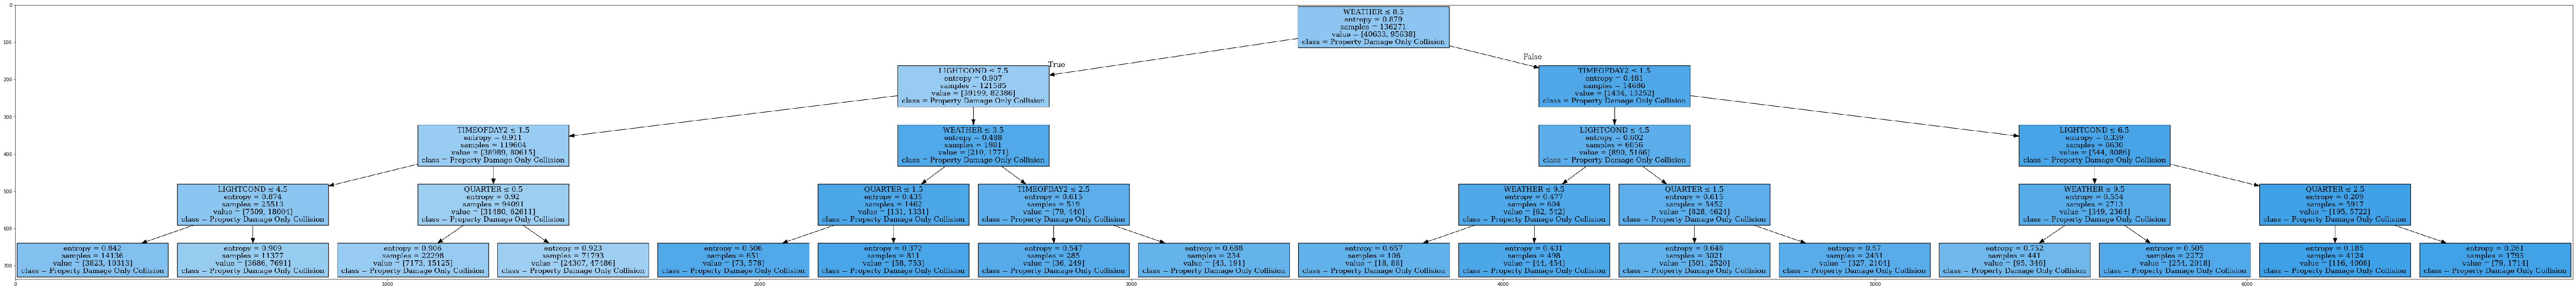

In [29]:
dot_data = StringIO()
filename = "Dtree.png"
featureNames = dfdtree.columns[0:4]
targetNames = dfdtree["SEVERITYDESC"].unique().tolist()
out=tree.export_graphviz(DTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 300))
plt.imshow(img,interpolation='nearest')